<a href="https://colab.research.google.com/github/LolitaOnayeva/Detecting-Mental-Health-Conditions-on-Reddit-using-NLP-and-machine-learning-/blob/main/WD_5k_NN_Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import csv 
import re
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mental_health_data/without_depression_df.csv')

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['post'] = df['post'].apply(clean_text)
df['post'] = df['post'].str.replace('\d+', '')

In [ ]:
df['post']

0        anyone else like taking long walks snows every...
1        meditation making anious couple sessions day h...
2        rant aniety meds ive self medicating benzodiaz...
3        advice friend please dated girl year moved awa...
4        feeling like im back started ive feeling lot b...
                               ...                        
94872    coteaching waste coteacher two choices help ki...
94873    challenged st year teacher arm wrestling match...
94874    pros cons elementary school teaching im confus...
94875    parentteacher conferences para honestly dont g...
94876    pearson scanning palms registering nes  eam li...
Name: post, Length: 94877, dtype: object

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 5000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['post'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 170391 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df['post'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (94877, 250)


In [ ]:
X[100]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
Y = pd.get_dummies(df['subreddit']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (94877, 11)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(75901, 250) (75901, 11)
(18976, 250) (18976, 11)


In [ ]:
from keras.layers import Input, Embedding, Dense, LSTM,SpatialDropout1D,MaxPooling1D,Conv1D,Flatten,Dropout
from keras.models import Model

#LSTM 100


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(11, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          500000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 11)                1111      
Total params: 581,511
Trainable params: 581,511
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train,
                    epochs=10,
                    validation_data=(X_test, Y_test),
                    batch_size=512)

Epoch 1/10
149/149 [==============================] - 573s 4s/step - loss: 1.8121 - accuracy: 0.3893 - val_loss: 0.7598 - val_accuracy: 0.7806
Epoch 2/10
149/149 [==============================] - 537s 4s/step - loss: 0.6737 - accuracy: 0.8016 - val_loss: 0.5186 - val_accuracy: 0.8513
Epoch 3/10
149/149 [==============================] - 532s 4s/step - loss: 0.4716 - accuracy: 0.8614 - val_loss: 0.4577 - val_accuracy: 0.8610
Epoch 4/10
149/149 [==============================] - 532s 4s/step - loss: 0.4300 - accuracy: 0.8726 - val_loss: 0.7101 - val_accuracy: 0.8012
Epoch 5/10
149/149 [==============================] - 531s 4s/step - loss: 0.5426 - accuracy: 0.8379 - val_loss: 0.4846 - val_accuracy: 0.8605
Epoch 6/10
149/149 [==============================] - 530s 4s/step - loss: 0.3848 - accuracy: 0.8846 - val_loss: 0.4284 - val_accuracy: 0.8736
Epoch 7/10
149/149 [==============================] - 529s 4s/step - loss: 0.3440 - accuracy: 0.8966 - val_loss: 0.4067 - val_accuracy: 0.8809

In [ ]:
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
#plot_history(history)

Training Accuracy: 0.9267
Testing Accuracy:  0.8923


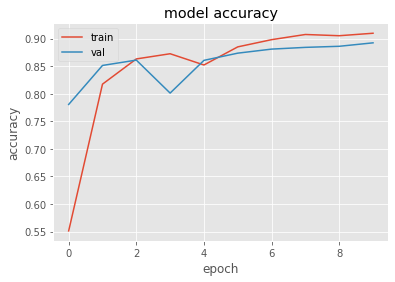

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
rounded_predictions = model.predict(X_test, batch_size=128, verbose=0)
rounded_predictions=np.argmax(rounded_predictions, axis=1)
rounded_predictions[1]
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels[1]

0

In [ ]:
labels=['anxiety','bipolarreddit','conspiracy','depression','fitness','meditation','parenting',
        'personalfinance','schizophrenia','suicide','teaching','ptsd']
cm = confusion_matrix(rounded_labels, rounded_predictions)
cm

array([[3784,    3,   24,   36,   25,   41,    4,   35,   32,  300,    8],
       [  47,   38,    3,    3,    2,    4,    8,  124,   42,   60,    0],
       [  15,    0, 1369,   13,   11,   20,    4,    0,   15,   45,    6],
       [  27,    0,   21, 3341,    5,   13,    0,    0,    0,   11,    3],
       [  38,    1,   18,   13,  876,    4,    0,    2,    9,    8,    2],
       [  25,    0,   33,   11,    5, 1719,    7,    3,    1,   33,   17],
       [   0,    1,   10,    2,    1,    4,  261,    1,    3,    4,   18],
       [  67,   18,    2,    1,    3,    5,    3,  229,   16,   70,    1],
       [  65,   10,   25,    5,    8,    7,    4,   18,  283,   69,    0],
       [ 147,    0,   35,   19,    6,   44,    5,   10,   15, 4811,    3],
       [   7,    0,   11,    9,    3,   30,    8,    0,    0,   11,  221]])

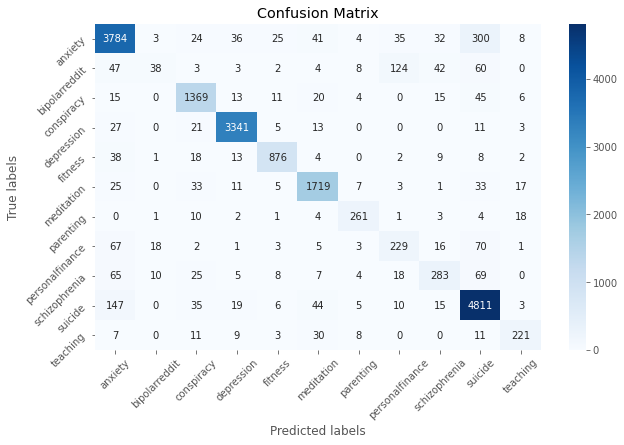

In [ ]:
fig = plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap='Blues',fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.set_xticklabels(labels=labels,rotation=45); ax.set_yticklabels(labels=labels,rotation=45);

#CNN


In [ ]:
model2 = Sequential()
model2.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model2.add(SpatialDropout1D(0.2))
model2.add(Conv1D(6, 3, padding='same', activation='relu'))
model2.add(MaxPooling1D())
model2.add(Flatten())
model2.add(Dense(250, activation='relu'))
model2.add(Dense(11, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 250, 100)          500000    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 250, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 250, 6)            1806      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 125, 6)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 750)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 250)               187750    
_________________________________________________________________
dense_5 (Dense)              (None, 11)               

In [ ]:
history = model2.fit(X_train, Y_train,
                    epochs=10,
                    validation_data=(X_test, Y_test),
                    batch_size=512)

Epoch 1/10
149/149 [==============================] - 52s 329ms/step - loss: 1.7319 - accuracy: 0.3977 - val_loss: 0.7101 - val_accuracy: 0.7914
Epoch 2/10
149/149 [==============================] - 49s 327ms/step - loss: 0.6355 - accuracy: 0.8130 - val_loss: 0.5467 - val_accuracy: 0.8362
Epoch 3/10
149/149 [==============================] - 49s 327ms/step - loss: 0.4650 - accuracy: 0.8589 - val_loss: 0.4985 - val_accuracy: 0.8500
Epoch 4/10
149/149 [==============================] - 49s 328ms/step - loss: 0.3662 - accuracy: 0.8895 - val_loss: 0.4633 - val_accuracy: 0.8629
Epoch 5/10
149/149 [==============================] - 49s 328ms/step - loss: 0.3019 - accuracy: 0.9088 - val_loss: 0.4564 - val_accuracy: 0.8684
Epoch 6/10
149/149 [==============================] - 49s 328ms/step - loss: 0.2493 - accuracy: 0.9261 - val_loss: 0.4720 - val_accuracy: 0.8654
Epoch 7/10
149/149 [==============================] - 49s 328ms/step - loss: 0.2179 - accuracy: 0.9354 - val_loss: 0.4640 - val_ac

In [ ]:
loss, accuracy = model2.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9738
Testing Accuracy:  0.8680


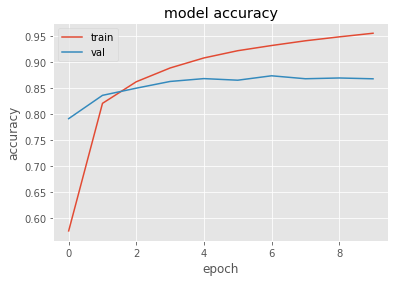

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
rounded_predictions2 = model2.predict(X_test, batch_size=128, verbose=0)
rounded_predictions2=np.argmax(rounded_predictions2, axis=1)
rounded_predictions2[1]
rounded_labels2=np.argmax(Y_test, axis=1)
rounded_labels2[1]

0

In [ ]:
labels=['anxiety','bipolarreddit','conspiracy','depression','fitness','meditation','parenting',
        'personalfinance','schizophrenia','suicide','teaching','ptsd']
cm2 = confusion_matrix(rounded_labels2, rounded_predictions2)
cm2

array([[3828,   19,   28,   35,   51,   38,    2,   37,   31,  202,   21],
       [  60,  153,    4,    6,    0,    4,    4,   11,   28,   61,    0],
       [  19,    1, 1304,   14,   19,   32,   14,    1,   15,   62,   17],
       [  42,    1,   17, 3270,   11,   16,   25,    0,    2,   23,   14],
       [  72,    0,   23,   17,  834,    1,    0,    1,    5,    5,   13],
       [  42,    1,   40,    8,    0, 1648,   29,   13,    3,   29,   41],
       [   2,    0,   12,   12,    0,   19,  253,    0,    0,    2,    5],
       [  98,    2,    1,    1,    2,   12,    1,  238,   14,   45,    1],
       [ 114,   19,   26,    8,    5,    9,    1,   17,  228,   62,    5],
       [ 361,   18,   80,   20,    5,   40,    4,   36,   36, 4492,    3],
       [  22,    1,    9,    2,    5,   31,    1,    0,    0,    5,  224]])

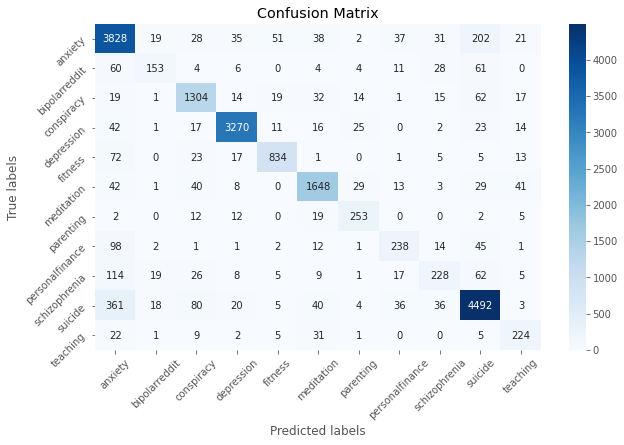

In [ ]:
fig = plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm2, annot=True, cmap='Blues',fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.set_xticklabels(labels=labels,rotation=45); ax.set_yticklabels(labels=labels,rotation=45);

#LSTM+CNN

In [ ]:
model3 = Sequential()
model3.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model3.add(SpatialDropout1D(0.2))
model3.add(Conv1D(filters=6, kernel_size=3, padding='same', activation='relu'))
model3.add(MaxPooling1D(pool_size=2))
model3.add(LSTM(100))
model3.add(Dense(11, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 250, 100)          500000    
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 250, 100)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 250, 6)            1806      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 125, 6)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               42800     
_________________________________________________________________
dense_7 (Dense)              (None, 11)                1111      
Total params: 545,717
Trainable params: 545,717
Non-trainable params: 0
________________________________________________

In [ ]:
history = model3.fit(X_train, Y_train,
                    epochs=10,
                    validation_data=(X_test, Y_test),
                    batch_size=512)

Epoch 1/10
149/149 [==============================] - 155s 1s/step - loss: 1.9413 - accuracy: 0.3203 - val_loss: 0.9422 - val_accuracy: 0.7125
Epoch 2/10
149/149 [==============================] - 151s 1s/step - loss: 0.8636 - accuracy: 0.7341 - val_loss: 0.6942 - val_accuracy: 0.7855
Epoch 3/10
149/149 [==============================] - 151s 1s/step - loss: 0.6220 - accuracy: 0.8085 - val_loss: 0.5332 - val_accuracy: 0.8394
Epoch 4/10
149/149 [==============================] - 152s 1s/step - loss: 0.4687 - accuracy: 0.8588 - val_loss: 0.4767 - val_accuracy: 0.8595
Epoch 5/10
149/149 [==============================] - 152s 1s/step - loss: 0.4062 - accuracy: 0.8773 - val_loss: 0.4661 - val_accuracy: 0.8570
Epoch 6/10
149/149 [==============================] - 152s 1s/step - loss: 0.3607 - accuracy: 0.8892 - val_loss: 0.4300 - val_accuracy: 0.8704
Epoch 7/10
149/149 [==============================] - 152s 1s/step - loss: 0.3253 - accuracy: 0.8997 - val_loss: 0.4162 - val_accuracy: 0.8790

In [ ]:
loss, accuracy = model3.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model3.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9382
Testing Accuracy:  0.8882


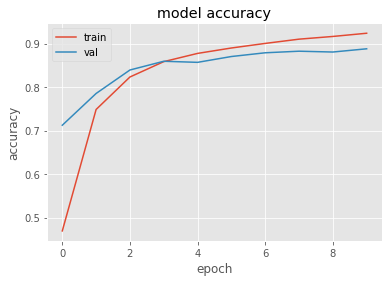

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
rounded_predictions3 = model3.predict(X_test, batch_size=128, verbose=0)
rounded_predictions3=np.argmax(rounded_predictions3, axis=1)
rounded_predictions3[1]
rounded_labels3=np.argmax(Y_test, axis=1)
rounded_labels3[1]

0

In [ ]:
labels=['anxiety','bipolarreddit','conspiracy','depression','fitness','meditation','parenting',
        'personalfinance','schizophrenia','suicide','teaching','ptsd']
cm3 = confusion_matrix(rounded_labels3, rounded_predictions3)
cm3

array([[3836,   16,   23,   33,   23,   20,    6,   29,   35,  253,   18],
       [  51,  128,    4,    1,    0,    2,    0,    5,   81,   57,    2],
       [  10,    0, 1345,   22,    6,   19,   20,    0,    7,   54,   15],
       [  46,    0,   42, 3291,    7,    9,    1,    0,    2,   10,   13],
       [  56,    0,   15,   13,  843,    6,    3,    2,    3,   11,   19],
       [  23,    0,   44,    6,    8, 1683,   11,    1,   13,   42,   23],
       [   2,    0,   26,    1,    0,    8,  251,    0,    7,    3,    7],
       [  61,   10,    2,    1,    0,    7,    2,  264,   16,   52,    0],
       [  58,   24,   26,    6,    6,    9,   10,   11,  281,   59,    4],
       [ 221,   15,   68,    9,    6,   31,    3,   14,   18, 4707,    3],
       [  14,    0,   14,    3,    2,   18,   14,    1,    3,    6,  225]])

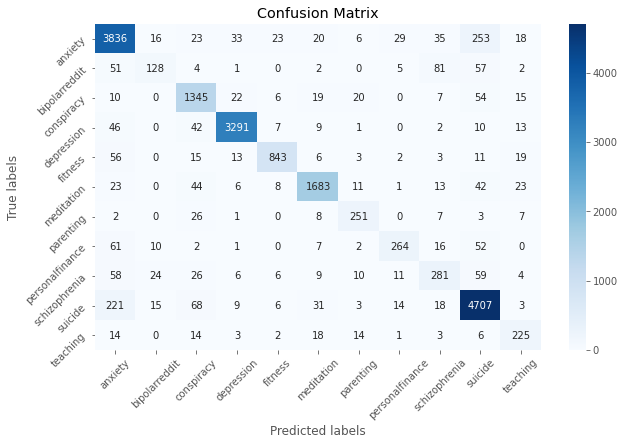

In [ ]:
fig = plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm3, annot=True, cmap='Blues',fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.set_xticklabels(labels=labels,rotation=45); ax.set_yticklabels(labels=labels,rotation=45);